# Überlegungen zu KITTI

Für KITTI muss die Perspektivtransformation angepasst werden.
Außerdem müssen Formen wie Pfeile, etc. herausgefiltert werden.

In [1]:
import cv2 as cv
from matplotlib import pyplot as plt

### Perspektivtransformation

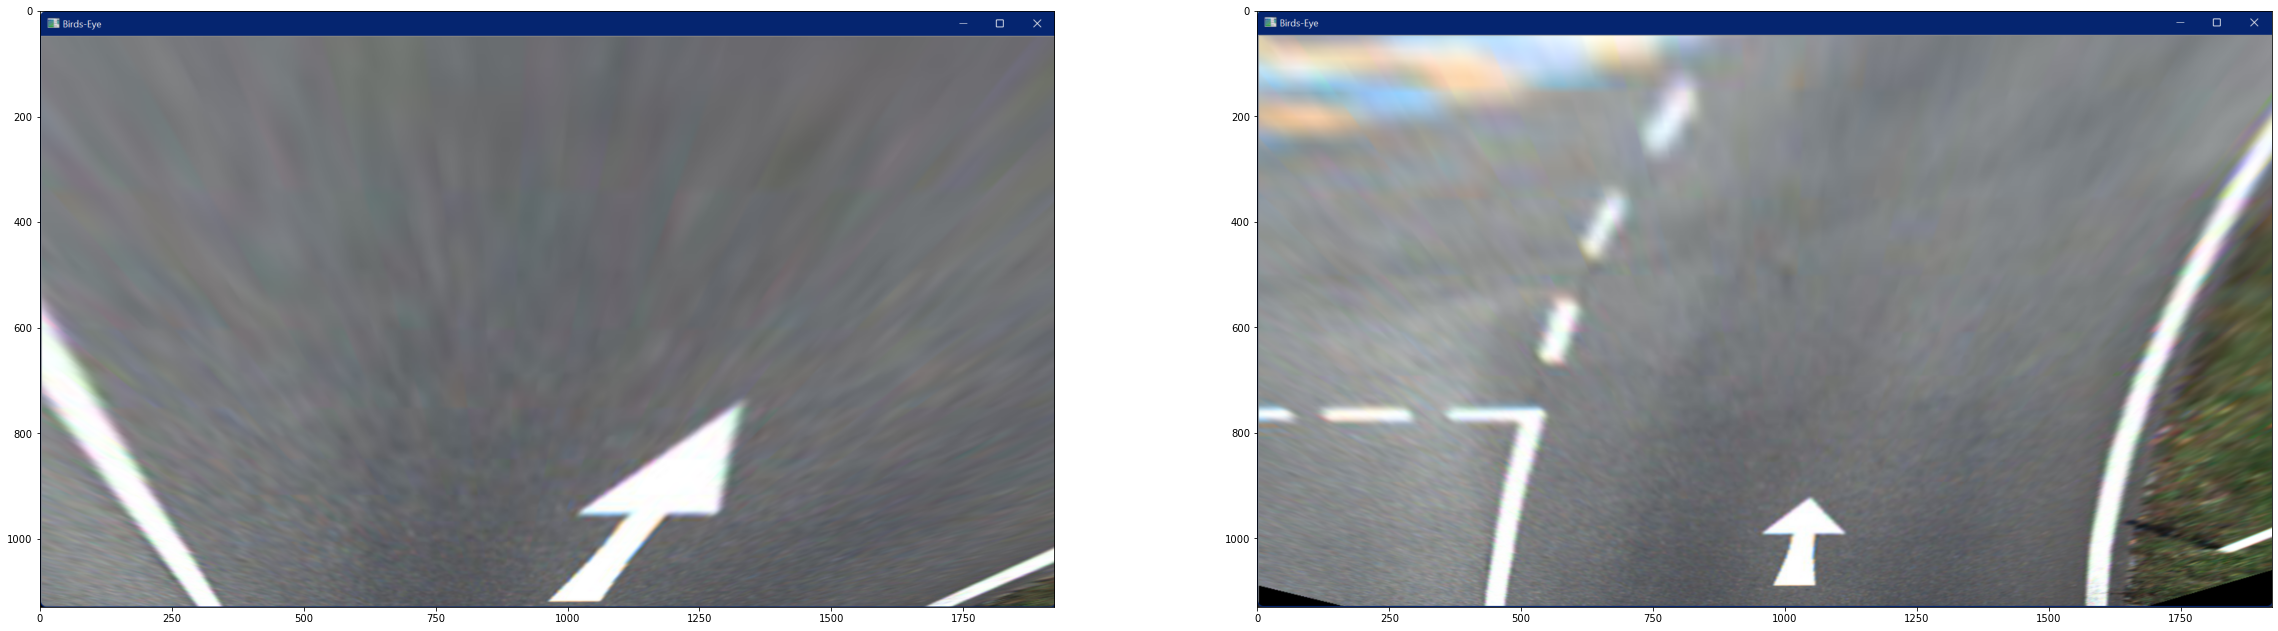

In [2]:
plt.figure(figsize=(40, 20))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(cv.imread("img/screenshots/original.png"), cv.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(cv.imread("img/screenshots/changed.png"), cv.COLOR_BGR2RGB))

plt.show()

### Pfeil-Problem
Die nachfolgende Abbildung verdeutlicht das Problem der Pfeile in der Mitte der Fahrbahn.

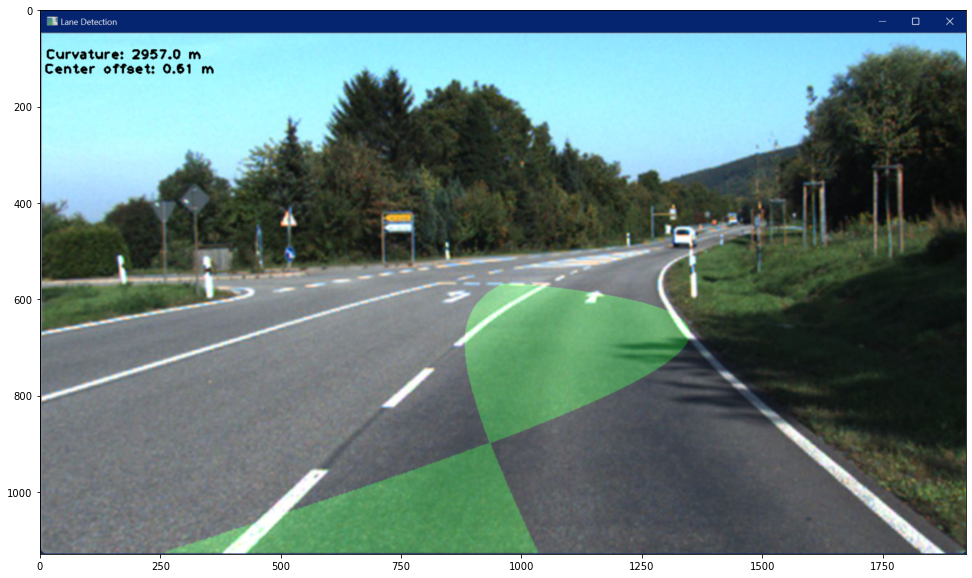

In [3]:
plt.figure(figsize=(20, 10))
plt.imshow(cv.cvtColor(cv.imread("img/screenshots/lanes.png"), cv.COLOR_BGR2RGB))
plt.show()

Hier wird das Polynom so gesucht, dass auch die Punkte des Pfeils in der Mitte als Bestandteil der Spurmarkierung zählen. Dadurch kommt es zu der starken Krümmung der beiden Polynome.

Dies kann durch ein *Sliding-Window* System behoben werden. Hier wird die transformierte Vogelperspektive auf der Höhe in verschiedene *Windows* aufgeteilt, in denen sich die relevanten Spurmarkierungen befinden dürfen. Dadurch werden zu starke Abweichungen ignoriert und nicht in das Polynom-Fitting einbezogen.

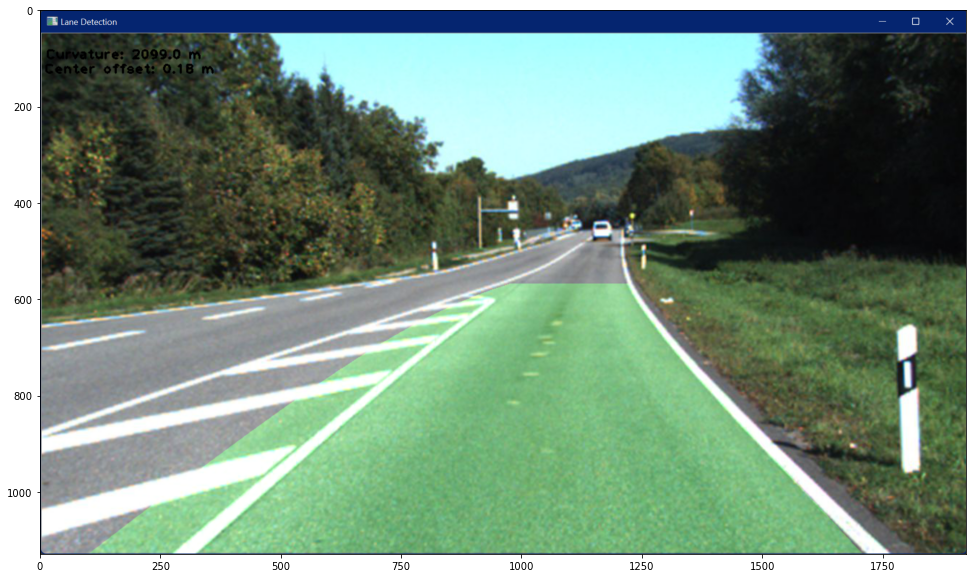

In [4]:
plt.figure(figsize=(20, 10))
plt.imshow(cv.cvtColor(cv.imread("img/screenshots/stripes.png"), cv.COLOR_BGR2RGB))
plt.show()

Ähnlich zu dem Problem der Pfeile stellen auch die Querstreifen ein (kleines) Problem für die Spurerkennung dar. Allerdings ist es in diesem Fall halb so wild, da die Spur weiterhin größtenteils korrekt erkannt wird. Im schlimmsten Fall würde es hier zu einer Befahrung des durchgestrichenen Bereiches führen.